<a href="https://colab.research.google.com/github/roygeorgekala/RandomForestAlgorithm/blob/master/RandomForestDemonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and adapting the data set

In [19]:
import numpy as np
import pandas as pd

We load in the iris dataset from the default sklearn datasets

In [20]:
from sklearn import datasets
iris_data = datasets.load_iris()

The types of labels, or the classes wherein we need to classify it is the setosa, vericolor and virginica types of the Iris flower

In [21]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


The various kinds of features present in the data set are: 

1. Sepal length
2. Sepal width
3. Petal Length
4. Petal width

all in centimetres(cm). 




In [22]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The dataset contains 150 entries, with 50 each belonging to each of the 3 classes of Iris flowers.

In [23]:
print(len(iris_data.data))
_ , counts = np.unique(iris_data.target, return_counts=True)
print(counts)

150
[50 50 50]


 Create a Pandas Dataframe out of the dataset

In [24]:
data = pd.DataFrame({
    'Sepal Length':iris_data.data[:,0],
    'Sepal Width':iris_data.data[:,1],
    'Petal Length':iris_data.data[:,2],
    'Petal Width':iris_data.data[:,3],
    'Species':iris_data.target

})
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We seperate out the features and labels of the dataset, and then further split into training and testing batches, with a 70:30 split between the training and testing.



# Splitting data set into training and testing sections

We know linear regression is based on the equation *Y = b0 + x1*b1 + x2*b2 + .... + xn * bn*
In this case therefore, we have the X values to be Sepal Length, Sepal Width, Petal Length and Petal Length, as the independent variables ; and the Y value to be the Species of the Iris flower.

In [25]:
from sklearn.model_selection import train_test_split

X = data[['Sepal Length','Sepal Width','Petal Length','Petal Width']] # Features of dataset
Y = data['Species'] # Label

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.7) # 0.7 => 70 percent for training and 30 percent for testing 

# Creating, training and testing Classifier Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)

RandomForestClassifier()

Accuracy gives a measure of accuracy of the model between the predicted values of the model and the actual outputs corresponding to the inputs from the testing data set

In [27]:
from sklearn import metrics

pred = classifier.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test,pred))

Accuracy:  0.9333333333333333


Prediciting the outputs for some random values of sepal and petal lengths and widths. 

In [28]:
print(classifier.predict([[6.5,3,5,2]])[0]) 
print(classifier.predict([[6,2,5,1]])[0])
print(classifier.predict([[5.1,3.5,1.4,0.3]])[0])

2
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Demonstration of Random Tree Algorithm consisting of various Decision Trees

As we know, the Random Forest Algorithm utilizes '*n*' number of Decision trees each unique, to then give an output, after which the Random Forest Algorithm then uses a Majority vote system to pick its output. 

Here we are demonstrating that for n = 100, we have both the first and the 100th estimator of the Random Forest Classifier to be an independent Decision tree.

We also plot some of the decision trees of the classifier to demonstrate how each of them are different in structure. 

Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly

DecisionTreeClassifier(max_features='auto', random_state=959053893)
DecisionTreeClassifier(max_features='auto', random_state=1814776224)



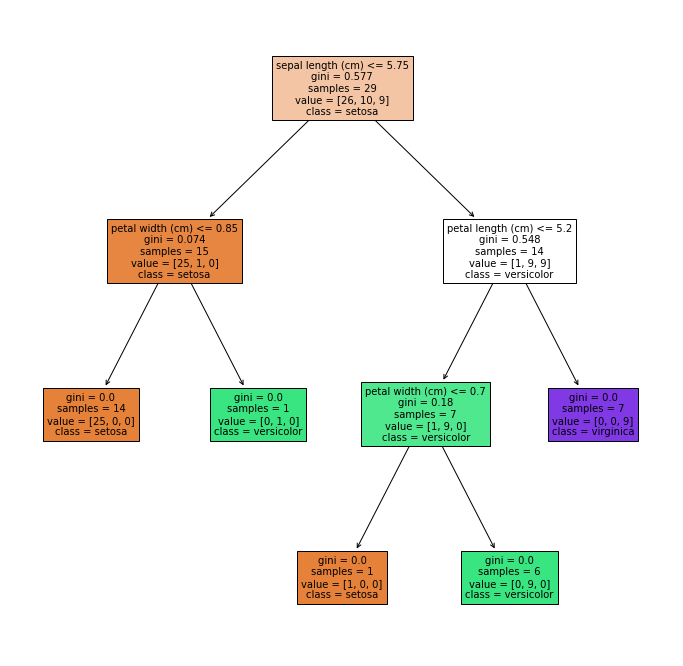

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print(classifier.estimators_[0])
print(classifier.estimators_[99],end="\n\n")

plt.figure(figsize=(12,12))
plot_tree(classifier.estimators_[5],class_names=iris_data.target_names,feature_names=iris_data.feature_names,filled=True, fontsize=10)
plt.show()

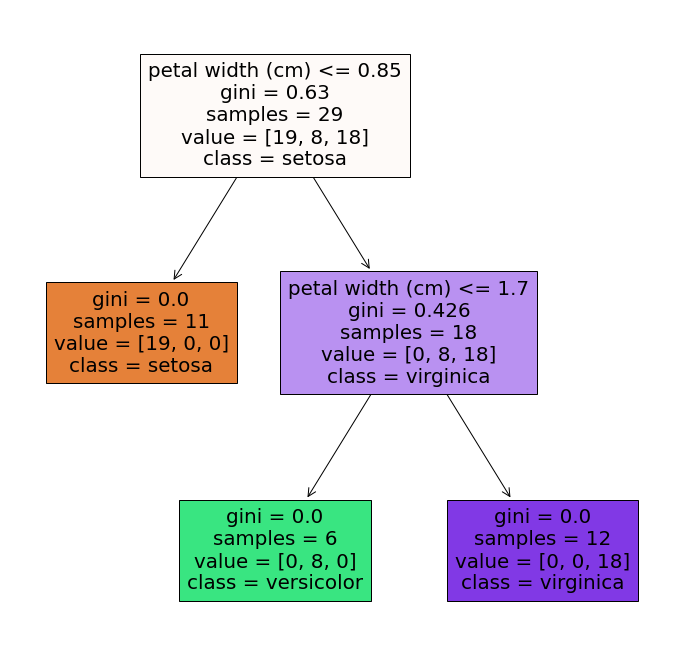

In [30]:
plt.figure(figsize=(12,12))
plot_tree(classifier.estimators_[11],class_names=iris_data.target_names,feature_names=iris_data.feature_names,filled=True)
plt.show()

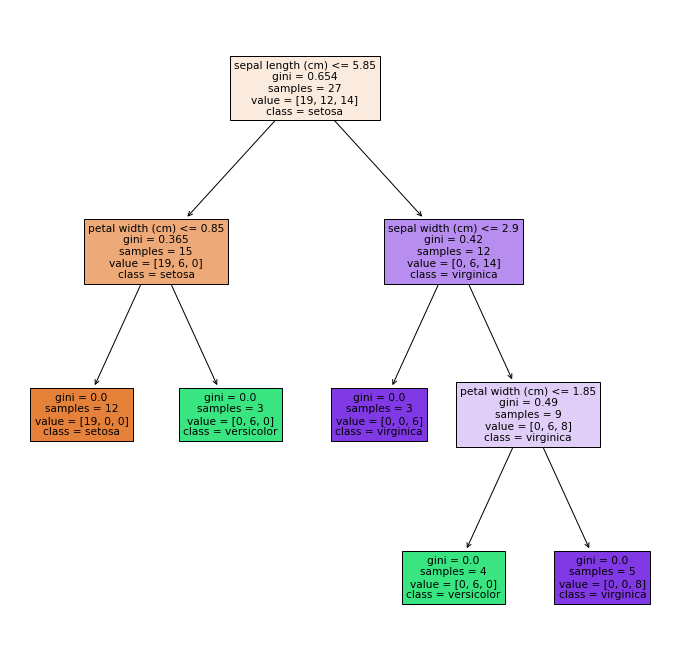

In [31]:
plt.figure(figsize=(12,12))
plot_tree(classifier.estimators_[55],class_names=iris_data.target_names,feature_names=iris_data.feature_names,filled=True)
plt.show()

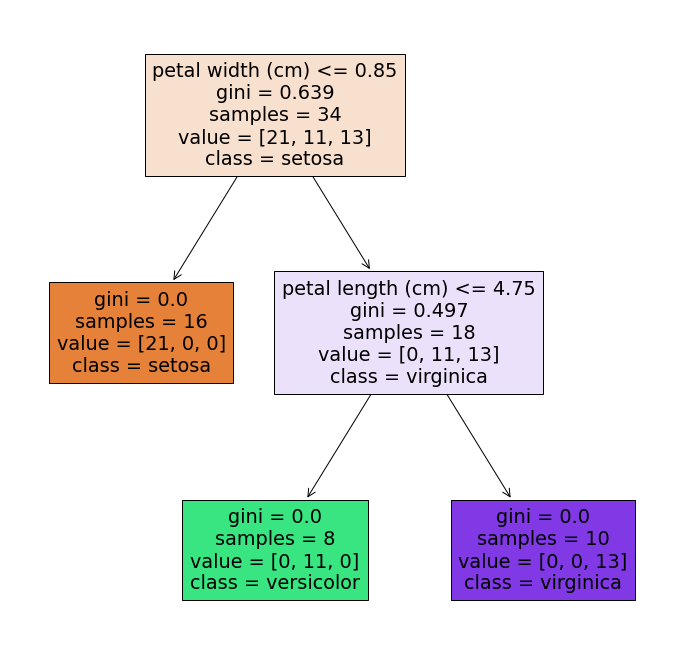

In [32]:
plt.figure(figsize=(12,12))
plot_tree(classifier.estimators_[65],class_names=iris_data.target_names,feature_names=iris_data.feature_names,filled=True)
plt.show()